In [1]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
# select a pyplot style
plt.style.use('fivethirtyeight')
import seaborn as sns
import cufflinks as cf
cf.go_offline()
import plotly.express as px

# adjust pandas display
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 100)

In [2]:
# load the data
fbal = pd.read_csv('CompleteDataset.csv', index_col=0, low_memory=False)

fbal.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# dimension
fbal.shape

(17981, 74)

In [4]:
# data info
fbal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17981 entries, 0 to 17980
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 17981 non-null  object 
 1   Age                  17981 non-null  int64  
 2   Photo                17981 non-null  object 
 3   Nationality          17981 non-null  object 
 4   Flag                 17981 non-null  object 
 5   Overall              17981 non-null  int64  
 6   Potential            17981 non-null  int64  
 7   Club                 17733 non-null  object 
 8   Club Logo            17981 non-null  object 
 9   Value                17981 non-null  object 
 10  Wage                 17981 non-null  object 
 11  Special              17981 non-null  int64  
 12  Acceleration         17981 non-null  object 
 13  Aggression           17981 non-null  object 
 14  Agility              17981 non-null  object 
 15  Balance              17981 non-null 

In [5]:
# determine the cols to keep
cols_2_keep = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Special', 
               'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure','Crossing', 
               'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 
               'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping','Long passing', 
               'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 
               'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision','Volleys', 
              'Preferred Positions']

fbal1 = fbal.copy()

fbal1 = fbal1[cols_2_keep]

In [6]:
fbal1.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,GK


In [7]:
fbal1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17981 entries, 0 to 17980
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 17981 non-null  object
 1   Age                  17981 non-null  int64 
 2   Nationality          17981 non-null  object
 3   Overall              17981 non-null  int64 
 4   Potential            17981 non-null  int64 
 5   Club                 17733 non-null  object
 6   Value                17981 non-null  object
 7   Wage                 17981 non-null  object
 8   Special              17981 non-null  int64 
 9   Acceleration         17981 non-null  object
 10  Aggression           17981 non-null  object
 11  Agility              17981 non-null  object
 12  Balance              17981 non-null  object
 13  Ball control         17981 non-null  object
 14  Composure            17981 non-null  object
 15  Crossing             17981 non-null  object
 16  Curv

In [10]:
# determine if there are missing values.
missing = fbal1.isna().sum().sort_values(ascending=False)
percent_m = missing / len(fbal1)
dem = ('===' * 30)

print(f"\t\tNumber of missing values: \n{missing.head()} \n{dem} \n\t\tPercentage of missing values: \n{percent_m.head()}")

		Number of missing values: 
Club                   248
Preferred Positions      0
Agility                  0
Free kick accuracy       0
Finishing                0
dtype: int64 
		Percentage of missing values: 
Club                   0.013792
Preferred Positions    0.000000
Agility                0.000000
Free kick accuracy     0.000000
Finishing              0.000000
dtype: float64


#### The percentage of missing values in 'Club' is less than 2%

In [11]:
fbal1.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,LW


In [12]:
# det the unique values in each variable and the number of the unique values
for col in fbal1.columns:
    val = fbal1[col]
    print(f"{col}: \nUnique: {val.unique()} \nNumber of unique: {val.nunique()} \n{dem}")

Name: 
Unique: ['Cristiano Ronaldo' 'L. Messi' 'Neymar' ... 'A. Kelsey' 'B. Richardson'
 'L. Sackey'] 
Number of unique: 16975 
Age: 
Unique: [32 30 25 31 28 26 27 29 39 23 24 35 33 34 36 21 22 18 20 19 37 38 40 17
 44 41 16 43 47] 
Number of unique: 29 
Nationality: 
Unique: ['Portugal' 'Argentina' 'Brazil' 'Uruguay' 'Germany' 'Poland' 'Spain'
 'Belgium' 'Chile' 'Croatia' 'Wales' 'Italy' 'Slovenia' 'France' 'Gabon'
 'Sweden' 'Netherlands' 'Denmark' 'Slovakia' 'England' 'Colombia'
 'Austria' 'Greece' 'Czech Republic' 'Costa Rica' 'Armenia'
 'Bosnia Herzegovina' 'Ivory Coast' 'Senegal' 'Switzerland' 'Morocco'
 'Guinea' 'Egypt' 'Algeria' 'Cameroon' 'Serbia' 'Japan' 'Turkey' 'Ecuador'
 'Montenegro' 'Korea Republic' 'Kenya' 'Iceland' 'Mexico' 'Norway'
 'DR Congo' 'Ukraine' 'Russia' 'Finland' 'Republic of Ireland'
 'United States' 'Venezuela' 'Ghana' 'Uzbekistan' 'Nigeria' 'Canada'
 'Paraguay' 'Romania' 'Albania' 'Burkina Faso' 'Cape Verde' 'New Zealand'
 'Northern Ireland' 'Syria' 'Peru' '

### Data Cleaning.
* **Clean 'Value' and 'Wage'**

In [13]:
# preview of the 'Value' variable
fbal1['Value'].head(10)

0    €95.5M
1     €105M
2     €123M
3      €97M
4      €61M
5      €92M
6    €64.5M
7    €90.5M
8      €79M
9      €77M
Name: Value, dtype: object

In [14]:
# det the length of the strings in 'Value'
desc_st = fbal1['Value'].str.len().describe()
val_cnt = fbal1['Value'].str.len().value_counts()

print(f"Descriptive Stats: \n{desc_st} \n\n{dem} \nFrequency Table: \n{val_cnt}")

Descriptive Stats: 
count    17981.000000
mean         4.761137
std          0.678818
min          2.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          6.000000
Name: Value, dtype: float64 

Frequency Table: 
5    14594
4     1391
3     1292
6      448
2      256
Name: Value, dtype: int64


<br>

* The min length is 2 characters and the max is 6 characters.

In [13]:
# det the length of the strings 'Wage'
fbal1['Wage'].str.len().unique()

array([5, 4, 2, 3], dtype=int64)

In [19]:
def length_of_str_in_col(df, col, str_len):
    """A function that returns a dataframe containing the length of strings in the desired column."""
    my_filter = df[col].str.len() == str_len  # filter the 'Value'
    result = df.loc[my_filter, ['Name', col]]    # obtain a df containing the filtered result
    
    return result

In [20]:
def filter_col(df, col, my_str):
    '''A fuction that uses regex to filter strings. It returns a dataframe that matches the search.'''
    my_filter = df[col].str.lower().str.contains(f"{my_str}")  # filter the 'Value'
    result = df.loc[my_filter, ['Name', col]]    # obtain a df containing the filtered result
    
    return result

In [21]:
filter_col(fbal1, 'Value', "[0-9€mk]")     # display the possible patterns for 'Value'

,Name,Value
0,Cristiano Ronaldo,€95.5M
1,L. Messi,€105M
2,Neymar,€123M
3,L. Suárez,€97M
4,M. Neuer,€61M
...,...,...
17976,A. Kelsey,€50K
17977,B. Richardson,€0
17978,J. Young,€60K
17979,J. Lundstram,€60K


In [22]:
filter_col(fbal1, 'Wage', "[0-9€mk]")      # display the possible patterns for 'Wage'

,Name,Wage
0,Cristiano Ronaldo,€565K
1,L. Messi,€565K
2,Neymar,€280K
3,L. Suárez,€510K
4,M. Neuer,€230K
...,...,...
17976,A. Kelsey,€1K
17977,B. Richardson,€1K
17978,J. Young,€1K
17979,J. Lundstram,€1K


In [23]:
# length of strings in 'Value' = 2 (shortest string)
length_of_str_in_col(fbal1, 'Value', 2).head(2)

,Name,Value
162,Oscar,€0
167,Adrien Silva,€0


In [24]:
# length of strings in 'Value' = 6 (longest string)
length_of_str_in_col(fbal1, 'Value', 6).head(2)

,Name,Value
0,Cristiano Ronaldo,€95.5M
6,De Gea,€64.5M


**Comment (Value):**
* if the length is greater than 2 then pattern is **€[0-9]K** or **€[0-9]M**
* if the length is 2, then the pattern is **€0**

In [25]:
# length of strings in 'Wage' = 2 (shortest string)
length_of_str_in_col(fbal1, 'Wage', 2).head(2)

,Name,Wage
162,Oscar,€0
167,Adrien Silva,€0


In [26]:
# length of strings in 'Wage' = 5 (longest string)
length_of_str_in_col(fbal1, 'Wage', 5).head(2)

,Name,Wage
0,Cristiano Ronaldo,€565K
1,L. Messi,€565K


**Comment:**
* The possible patterns of 'Wage' based on the length of the strings are **€0, €1K, €61K, €565K**

In [27]:
# confirm that 'Value' has "€0"
filter_col(fbal1, 'Value', "€0").head(3) 

,Name,Value
162,Oscar,€0
167,Adrien Silva,€0
274,A. Witsel,€0


**Comment (Wage):**
* if the length is greater than 2 then pattern is **€[0-9]K**
* if the length is 2, then the pattern is **€0**

In [28]:
fbal2 = fbal1.copy()

In [29]:
# string manipulation
value = np.where(fbal2['Value'] == '€0',   # if this condition is met
         '€0K',                            # replace it with this value
         fbal2['Value'])                   # otherwise replace with the original value


wage = np.where(fbal2['Wage'] == '€0',     # if this condition is met
         '€0K',                            # replace it with this value
         fbal2['Wage'])                    # otherwise replace with the original value

fbal2['Value'] = value
fbal2['Wage'] = wage

In [30]:
# extract the currency
fbal2['Currency'] = fbal2['Value'].str.get(0)  # select the first string. i.e '€'

# extract the unit. i.e 'M' or 'K'
fbal2['Unit'] = fbal2['Value'].str.get(-1)

# extract the value
fbal2['Value (M)'] = fbal2['Value'].str[1:-1]

# extract the wage
fbal2['Wage (K)'] = fbal2['Wage'].str[1:-1]

In [31]:
fbal2.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Currency,Unit,Value (M),Wage (K)
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,ST LW,€,M,95.5,565
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,RW,€,M,105,565


In [32]:
fbal3 = fbal2.copy()

# convert to numeric
for col in ['Value (M)', 'Wage (K)']:
    fbal3[col] = pd.to_numeric(fbal3[col])

# convert the values with unit = 'K' to 'M'
fbal3['Value (M)'] = np.where(fbal3['Unit'] == 'K',              # if condition is True
                              (fbal3['Value (M)'] / 1_000),      # convert to millions
                              fbal3['Value (M)'])                # otherwise return the actual value

In [33]:
# drop irrelevant columns
fbal3 = fbal3.drop(columns=['Value', 'Wage'])

<br>

**Clean the other columns**

In [34]:
# filter rows that contain digits and '-' OR digits and '+' 
filter_col(fbal3, 'Acceleration', '[0-9].+[\+\-].+')['Acceleration'].head(3)

309    70+9
411    80+1
506    49-1
Name: Acceleration, dtype: object

In [35]:
cols_2_clean = ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure','Crossing', 
               'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 
               'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping','Long passing', 
               'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 
               'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision','Volleys']

# clean the columns
for col in cols_2_clean:
    fbal3[col] = np.where(fbal3[col].str.contains(r'[0-9].+[\+\-].+'),           # if condition is True
                              (fbal3[col].str[:2]),                              # extract the first 2 characters
                              fbal3[col])                                        # otherwise return the actual value

In [36]:
# verify the cleaning process
for col in cols_2_clean:
    val = fbal3[col]
    print(f"{col}: \nUnique: {val.unique()} \nNumber of unique: {val.nunique()} \n{dem}")

Acceleration: 
Unique: ['89' '92' '94' '88' '58' '79' '57' '93' '60' '78' '75' '76' '46' '90'
 '68' '49' '43' '87' '77' '95' '62' '72' '65' '70' '63' '82' '69' '67'
 '54' '55' '74' '86' '84' '48' '80' '71' '85' '40' '51' '38' '53' '73'
 '45' '61' '64' '44' '42' '81' '91' '59' '52' '66' '39' '34' '50' '83'
 '47' '96' '31' '30' '56' '26' '35' '36' '32' '41' '37' '28' '33' '20'
 '29' '17' '25' '27' '24' '22' '15' '21' '23' '18' '19' '16' '13' '14'
 '12' '11'] 
Number of unique: 86 
Aggression: 
Unique: ['63' '48' '56' '78' '29' '80' '38' '54' '60' '50' '84' '68' '23' '62'
 '65' '92' '34' '69' '57' '43' '82' '86' '66' '31' '77' '47' '90' '89'
 '75' '44' '93' '67' '51' '25' '72' '58' '74' '85' '55' '49' '81' '88'
 '91' '59' '83' '45' '52' '94' '17' '61' '87' '70' '32' '28' '73' '41'
 '71' '79' '35' '36' '20' '26' '40' '30' '39' '33' '64' '27' '76' '46'
 '18' '42' '37' '11' '22' '53' '15' '24' '19' '96' '21' '12' '16' '13'
 '14'] 
Number of unique: 85 
Agility: 
Unique: ['89' '90' '96' '86' 

### Convert the variables to the right data types (i.e object to int/float)

In [37]:
fbal4 = fbal3.copy()

# convert to numerical variables
for col in cols_2_clean:
    fbal4[col] = pd.to_numeric(fbal4[col])
    
# verify
fbal4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17981 entries, 0 to 17980
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 17981 non-null  object 
 1   Age                  17981 non-null  int64  
 2   Nationality          17981 non-null  object 
 3   Overall              17981 non-null  int64  
 4   Potential            17981 non-null  int64  
 5   Club                 17733 non-null  object 
 6   Special              17981 non-null  int64  
 7   Acceleration         17981 non-null  int64  
 8   Aggression           17981 non-null  int64  
 9   Agility              17981 non-null  int64  
 10  Balance              17981 non-null  int64  
 11  Ball control         17981 non-null  int64  
 12  Composure            17981 non-null  int64  
 13  Crossing             17981 non-null  int64  
 14  Curve                17981 non-null  int64  
 15  Dribbling            17981 non-null 

In [38]:
cols = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Currency', 'Value (M)', 'Wage (K)', 'Special',
      'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure','Crossing', 
      'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 
      'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping','Long passing', 
      'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 
      'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision','Volleys', 'Preferred Positions']

# rearrange the columns
fbal4 = fbal4[cols]

In [39]:
# random preview of the data
fbal4.sample(5, random_state=21)

,Name,Age,Nationality,Overall,Potential,Club,Currency,Value (M),Wage (K),Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
17816,S. Al Amrani,23,Saudi Arabia,50,59,Al Raed,€,0.04,2,1259,54,49,60,71,35,40,37,23,39,21,23,12,6,9,14,8,46,50,81,24,18,46,37,32,46,38,34,53,62,62,55,60,28,26,RB
4017,S. March,22,England,71,80,Brighton & Hove Albion,€,3.60,27,1755,79,49,80,79,71,68,67,70,79,66,64,9,11,7,13,15,35,30,42,62,71,35,55,63,59,67,74,39,78,70,37,61,64,54,CAM RM LM
4159,Juan Muñoz,21,Spain,71,76,UD Almería,€,3.20,10,1614,66,58,69,63,72,60,52,52,68,70,35,9,7,8,10,14,73,20,61,41,73,12,67,72,68,62,77,18,64,56,17,63,42,75,CAM ST
9314,D. Drocco,28,Argentina,66,66,Arsenal de Sarandí,€,0.65,4,1857,74,77,75,92,73,35,68,56,66,52,66,14,14,12,7,6,52,52,81,66,59,50,60,47,67,70,54,57,61,85,50,65,61,68,CDM CM
2868,Robson Denho,25,Brazil,73,73,Cruzeiro,€,3.50,24,1958,66,78,61,64,66,66,65,79,61,54,76,13,13,14,13,9,53,74,66,68,42,66,73,71,68,74,82,71,62,83,76,75,77,45,CM CDM


In [40]:
fbal5 = fbal4.copy()

# select the preferred position. The first element in the split is assumed to be the favourite position
fbal5['Fav_position'] = fbal4['Preferred Positions'].str.split().str[0]

# drop 'Preferred Positions'
fbal5 = fbal5.drop(columns=['Preferred Positions'])

In [42]:
fbal5.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Currency,Value (M),Wage (K),Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Fav_position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€,95.5,565,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,ST
1,L. Messi,30,Argentina,93,93,FC Barcelona,€,105.0,565,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,RW


### Descriptive Statistics

In [43]:
fbal5.describe()

,Age,Overall,Potential,Value (M),Wage (K),Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,17981.000000,17981.000000,17981.000000,17981.00000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,25.144541,66.247984,71.190813,2.38539,11.546966,1594.095100,64.600578,55.822257,63.342417,63.815528,58.109838,57.896057,49.781380,47.311996,55.067238,45.299538,43.179968,16.737779,16.513709,16.391914,16.501196,16.867249,52.343196,46.559924,64.900895,52.453812,47.218620,44.111117,48.988710,49.654191,61.904844,58.302931,55.661031,45.572048,64.832212,63.261109,47.446026,65.291363,53.022635,43.227852
std,4.614272,6.987965,6.102199,5.35397,23.080000,272.151435,14.907052,17.468440,14.791361,14.094377,16.799127,12.926942,18.459139,18.461347,18.991248,19.475738,17.577351,17.790776,17.013013,16.605478,17.128074,18.082975,17.410172,20.682663,11.884725,15.535665,19.282551,21.576320,15.812455,19.437103,9.171952,14.922538,17.398559,21.484684,14.637391,15.922908,21.834465,12.617383,14.387463,17.735041
min,16.000000,46.000000,46.000000,0.00000,0.000000,728.000000,11.000000,11.000000,14.000000,11.000000,8.000000,5.000000,5.000000,6.000000,2.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,13.000000,7.000000,3.000000,4.000000,5.000000,2.000000,28.000000,10.000000,3.000000,4.000000,11.000000,12.000000,4.000000,12.000000,10.000000,4.000000
25%,21.000000,62.000000,67.000000,0.30000,2.000000,1449.000000,56.000000,43.000000,55.000000,56.000000,53.000000,51.000000,38.000000,34.000000,48.000000,29.000000,31.000000,8.000000,8.000000,8.000000,8.000000,8.000000,45.000000,26.000000,58.000000,42.000000,32.000000,22.000000,39.000000,38.000000,55.000000,53.000000,46.000000,24.000000,57.000000,56.000000,26.000000,58.000000,43.000000,30.000000
50%,25.000000,66.000000,71.000000,0.67500,4.000000,1633.000000,67.000000,59.000000,65.000000,66.000000,63.000000,60.000000,54.000000,48.000000,61.000000,48.000000,42.000000,11.000000,11.000000,11.000000,11.000000,11.000000,56.000000,52.000000,66.000000,56.000000,51.000000,48.000000,50.000000,55.000000,62.000000,62.000000,59.000000,52.000000,67.000000,66.000000,54.000000,66.000000,55.000000,44.000000
75%,28.000000,71.000000,75.000000,2.10000,12.000000,1786.000000,75.000000,69.000000,74.000000,74.000000,69.000000,67.000000,64.000000,62.000000,68.000000,61.000000,57.000000,14.000000,14.000000,14.000000,14.000000,14.000000,64.000000,64.000000,73.000000,64.000000,63.000000,63.000000,61.000000,64.000000,68.000000,68.000000,69.000000,64.000000,75.000000,74.000000,66.000000,74.000000,64.000000,57.000000
max,47.000000,94.000000,94.000000,123.00000,565.000000,2291.000000,96.000000,96.000000,96.000000,96.000000,95.000000,96.000000,91.000000,92.000000,97.000000,95.000000,93.000000,91.000000,91.000000,95.000000,91.000000,90.000000,94.000000,92.000000,95.000000,93.000000,92.000000,92.000000,92.000000,95.000000,96.000000,92.000000,94.000000,91.000000,96.000000,95.000000,92.000000,98.000000,94.000000,91.000000


**Observations:**
* `Age`: Since the mean is slighly greater than the median, the distribution of the Age slightly positively skewed.
* `Overall`: The mean is slighly greater than the median it implies that the distribution of the Overall slightly positively skewed.
* `Potential`: The mean is slighly greater than the median it implies that the distribution of the Potential slightly positively skewed.
* `Value (M)`: It's positively skewed since mean >> median and it has outliers.
* `Wage (K)`: It's positively skewed since mean >> median and it has outliers.
* `Special`: Mean > Median. It's negatively skewed.

In [44]:
def split_variables(df):
    """Returns a list containing numerical and categorical variables"""
    num_cols = df.select_dtypes(include='number').columns.to_list()
    cat_cols = df.select_dtypes(exclude='number').columns.to_list()
    
    result = [num_cols, cat_cols]
    return result

In [45]:
# numerical and categorical column names
num_cols, cat_cols = split_variables(fbal5)

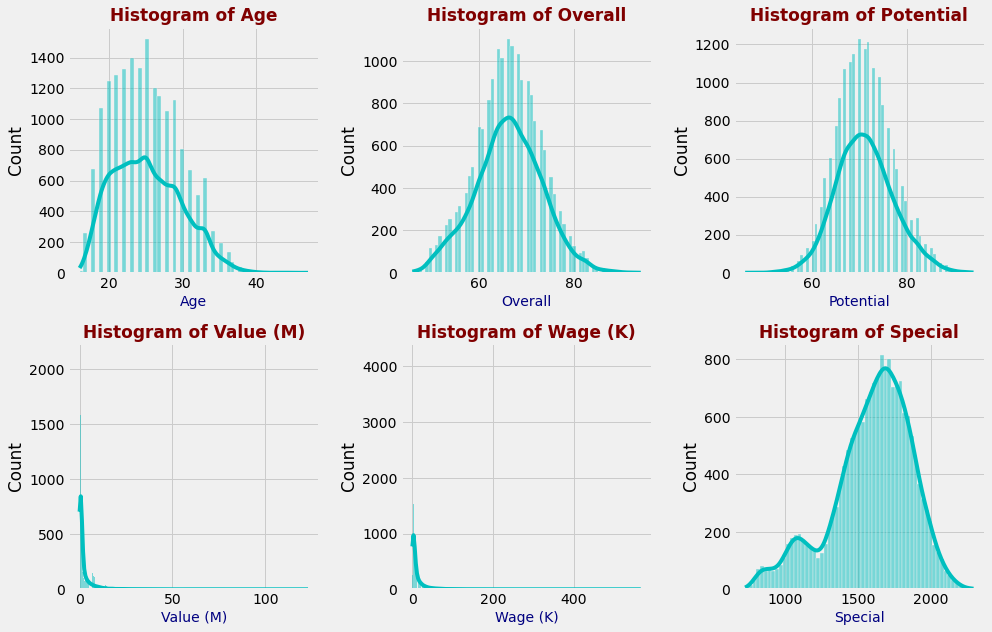

In [46]:
# histogram

nrows, ncols = 2, 3
fig, axs = plt.subplots(nrows, ncols, figsize=(nrows*7, ncols*3))
color = 'c'
color_x, color_t = 'navy', 'maroon'

for (idx, col) in enumerate(['Age', 'Overall', 'Potential', 'Value (M)', 'Wage (K)', 'Special']):
    ax = axs[(idx // ncols), (idx % ncols)]   # axis
    sns.histplot(data=fbal5, x=col, ax=ax, kde=True, color=color)                                      # plot histogram
    ax.set_xlabel(f"{col}", fontsize=14, color=color_x)                                                # x axis
    ax.set_title(f"Histogram of {col}", fontsize=17, color=color_t, fontweight='heavy')                # title
    
fig.tight_layout()
plt.show()

**Comment:**
* As expected, the distributions of 'Value (M)' and 'Wage (K)' are heavily right skewed with lots of outliers.
* The other variables follow a normal distribution.

In [47]:
# categorical features
fbal5[cat_cols].describe()

,Name,Nationality,Club,Currency,Fav_position
count,17981,17981,17733,17981,17981
unique,16975,165,647,1,15
top,J. Williams,England,Villarreal CF,€,CB
freq,7,1630,35,17981,2705


In [48]:
# Top 10 represented countries
a = pd.crosstab(index=fbal5['Nationality'], columns='Count').sort_values(by='Count', ascending=False)
a.columns = ['Count']
a.head(10)

,Count
Nationality,
England,1630
Germany,1140
Spain,1019
France,978
Argentina,965
Brazil,812
Italy,799
Colombia,592
Japan,469


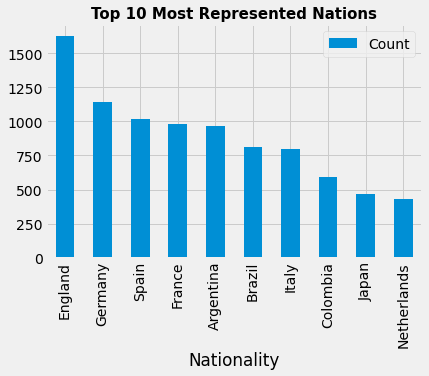

In [49]:
a.head(10).plot.bar()
plt.title('Top 10 Most Represented Nations', fontsize=15, fontweight='heavy')
plt.show()

**Comment:**
* England has more players in the game than any other nation.

In [50]:
# Top 10 represented clubs
a = pd.crosstab(index=fbal5['Club'], columns='Count').sort_values(by='Count', ascending=False)
a.columns = ['Count']
a.head(10)

,Count
Club,
Villarreal CF,35
OGC Nice,34
Manchester United,34
VfL Wolfsburg,34
UD Las Palmas,34
FC Nantes,34
Olympique Lyonnais,34
Borussia Dortmund,34
Newcastle United,33


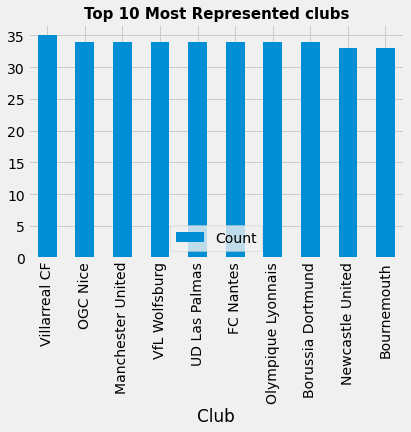

In [51]:
a.head(10).plot.bar()
plt.title('Top 10 Most Represented clubs', fontsize=15, fontweight='heavy')
plt.show()

In [52]:
# Frequency table of 'Fav_position'
a = pd.crosstab(index=fbal5['Fav_position'], columns='Count').sort_values(by='Count', ascending=False)
a.columns = ['Count']
a

,Count
Fav_position,
CB,2705
ST,2277
GK,2029
CM,1977
CDM,1396
RM,1350
LM,1326
LB,1309
RB,1195


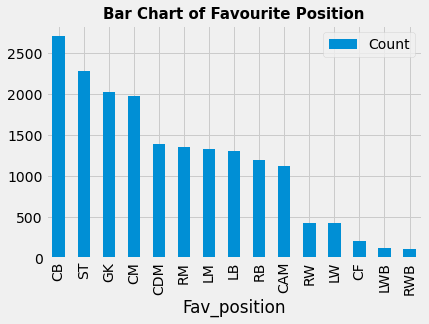

In [53]:
a.plot.bar()
plt.title('Bar Chart of Favourite Position', fontsize=15, fontweight='heavy')
plt.show()

In [54]:
# overall, potential by fav_position
a = fbal5.groupby(['Fav_position'])[['Overall', 'Potential']].agg(['median'])
a.columns = ['Overall', 'Potential']
a

,Overall,Potential
Fav_position,,
CAM,67,72.0
CB,67,71.0
CDM,67,71.0
CF,69,71.0
CM,66,71.0
GK,65,70.0
LB,66,70.0
LM,67,71.5
LW,67,73.0


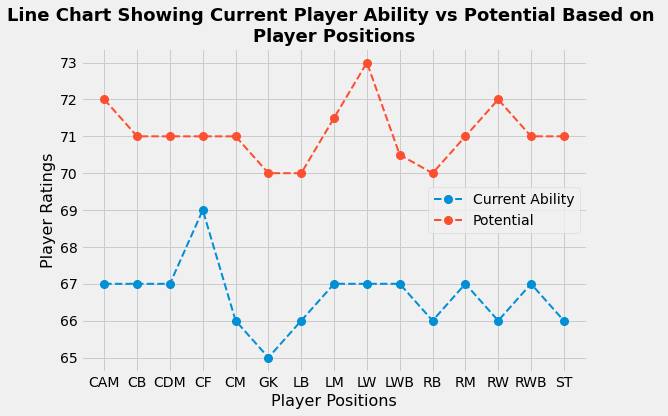

In [55]:
x_val, y1_val, y2_val = range(15),  a['Overall'], a['Potential']
plt.figure(figsize=(8, 6))

plt.plot(x_val, y1_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Current Ability')
plt.plot(x_val, y2_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Potential')
plt.xticks(ticks=x_val, labels=a.index)
plt.xlabel('Player Positions', fontsize=16)
plt.ylabel('Player Ratings', fontsize=16)
plt.title('Line Chart Showing Current Player Ability vs Potential Based on \nPlayer Positions', fontsize=18, fontweight='heavy')

plt.legend()
plt.tight_layout()
plt.show()

In [56]:
# overall, potential by fav_position, nationality
a = (
    fbal5.groupby(['Nationality'])[['Overall', 'Potential']]
    .agg(['median'])
)

a.columns = ['Overall', 'Potential']   # rename the cols
a = a.sort_values(['Overall', 'Potential'], ascending=False).head(15)    # sort the values in descendingly
a

,Overall,Potential
Nationality,,
Mozambique,74.0,75.0
Syria,73.5,76.0
Cuba,73.0,75.5
Dominican Republic,73.0,75.0
Moldova,73.0,74.0
Oman,73.0,73.0
Togo,72.5,74.0
Guatemala,72.0,72.0
Portugal,71.0,74.0


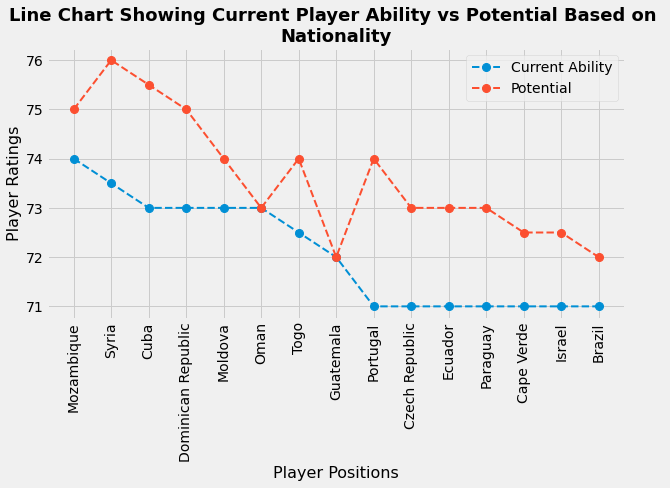

In [57]:
x_val, y1_val, y2_val = range(15),  a['Overall'], a['Potential']
plt.figure(figsize=(9, 7))

plt.plot(x_val, y1_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Current Ability')
plt.plot(x_val, y2_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Potential')
plt.xticks(ticks=x_val, labels=a.index, rotation='vertical')
plt.xlabel('Player Positions', fontsize=16)
plt.ylabel('Player Ratings', fontsize=16)
plt.title('Line Chart Showing Current Player Ability vs Potential Based on \nNationality', fontsize=18, fontweight='heavy')

plt.legend()
plt.tight_layout()
plt.show()

<br>
<br>

#### Determine the best players in each position

In [58]:
def fballers_by_position(df, pos):
    """It returns a df containing the Name, Age, Overal and Potential of the players."""
    result = df.loc[df['Fav_position'] == pos, ['Name', 'Age', 'Overall', 'Potential']][:15]
    return result

In [59]:
# CAM
a = fballers_by_position(fbal5,'CAM')
# a = a.set_index(keys='Name')
a

,Name,Age,Overall,Potential
54,Coutinho,25,86,89
59,R. Nainggolan,29,86,86
65,Cesc Fàbregas,30,86,86
112,I. Perišić,28,84,84
114,Willian,28,84,84
120,D. Payet,30,84,84
128,O. Dembélé,20,83,92
129,N. Keïta,22,83,88
133,João Mário,24,83,88
145,Roberto Firmino,25,83,87


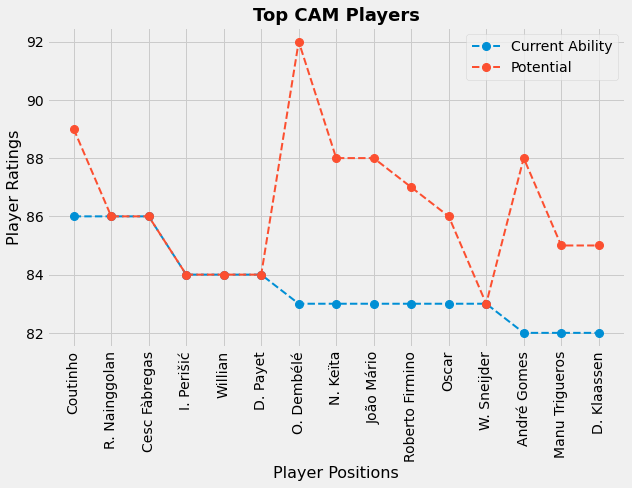

In [60]:
x_val, y1_val, y2_val = range(15),  a['Overall'], a['Potential']
plt.figure(figsize=(9, 7))

plt.plot(x_val, y1_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Current Ability')
plt.plot(x_val, y2_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Potential')
plt.xticks(ticks=x_val, labels=a['Name'], rotation='vertical')
plt.xlabel('Player Positions', fontsize=16)
plt.ylabel('Player Ratings', fontsize=16)
plt.title('Top CAM Players', fontsize=18, fontweight='heavy')

plt.legend()
plt.tight_layout()
plt.show()

In [61]:
# CB
a = fballers_by_position(fbal5,'CB')
a

,Name,Age,Overall,Potential
10,Sergio Ramos,31,90,90
17,G. Chiellini,32,89,89
24,L. Bonucci,30,88,88
25,J. Boateng,28,88,88
26,D. Godín,31,88,88
27,M. Hummels,28,88,88
30,Thiago Silva,32,88,88
44,Piqué,30,87,87
56,T. Alderweireld,28,86,87
57,David Luiz,30,86,86


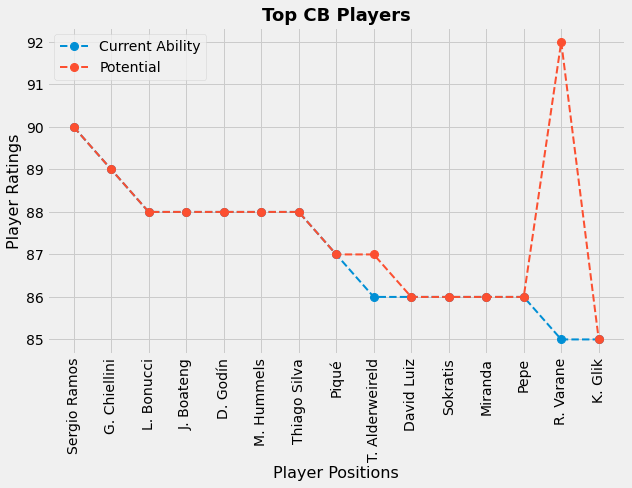

In [62]:
x_val, y1_val, y2_val = range(15),  a['Overall'], a['Potential']
plt.figure(figsize=(9, 7))

plt.plot(x_val, y1_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Current Ability')
plt.plot(x_val, y2_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Potential')
plt.xticks(ticks=x_val, labels=a['Name'], rotation='vertical')
plt.xlabel('Player Positions', fontsize=16)
plt.ylabel('Player Ratings', fontsize=16)
plt.title('Top CB Players', fontsize=18, fontweight='heavy')

plt.legend()
plt.tight_layout()
plt.show()

In [63]:
# CDM
a = fballers_by_position(fbal5,'CDM')
a

,Name,Age,Overall,Potential
8,T. Kroos,27,90,90
14,L. Modrić,31,89,89
22,Thiago,26,88,90
34,M. Verratti,24,87,91
35,P. Pogba,24,87,92
60,Javi Martínez,28,86,86
71,Casemiro,25,85,89
81,I. Gündoğan,26,85,87
84,M. Pjanić,27,85,86
85,C. Marchisio,31,85,85


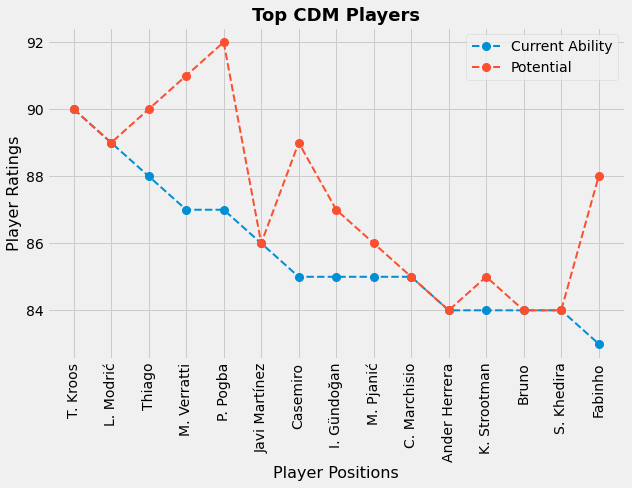

In [64]:
x_val, y1_val, y2_val = range(15),  a['Overall'], a['Potential']
plt.figure(figsize=(9, 7))

plt.plot(x_val, y1_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Current Ability')
plt.plot(x_val, y2_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Potential')
plt.xticks(ticks=x_val, labels=a['Name'], rotation='vertical')
plt.xlabel('Player Positions', fontsize=16)
plt.ylabel('Player Ratings', fontsize=16)
plt.title('Top CDM Players', fontsize=18, fontweight='heavy')

plt.legend()
plt.tight_layout()
plt.show()

In [65]:
# CF
a = fballers_by_position(fbal5,'CF')
a

,Name,Age,Overall,Potential
158,S. Kagawa,28,83,83
177,Jonas,33,83,83
184,Borja Valero,32,83,83
217,F. Vázquez,28,82,82
362,D. Perotti,28,81,81
455,A. Dzagoev,27,80,81
472,M. Berg,30,80,80
473,I. Piatti,32,80,80
508,Kaká,35,80,80
605,Y. Mallı,25,79,81


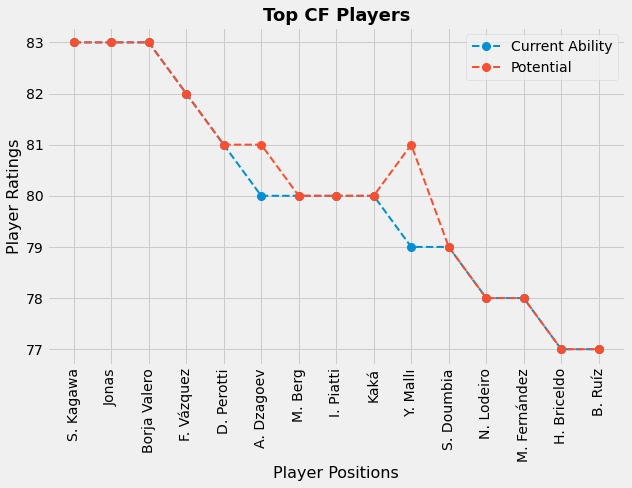

In [66]:
x_val, y1_val, y2_val = range(15),  a['Overall'], a['Potential']
plt.figure(figsize=(9, 7))

plt.plot(x_val, y1_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Current Ability')
plt.plot(x_val, y2_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Potential')
plt.xticks(ticks=x_val, labels=a['Name'], rotation='vertical')
plt.xlabel('Player Positions', fontsize=16)
plt.ylabel('Player Ratings', fontsize=16)
plt.title('Top CF Players', fontsize=18, fontweight='heavy')

plt.legend()
plt.tight_layout()
plt.show()

In [67]:
# CM
a = fballers_by_position(fbal5,'CM')
a

,Name,Age,Overall,Potential
33,N. Kanté,26,87,90
37,A. Vidal,30,87,87
40,M. Hamšík,29,87,87
41,I. Rakitić,29,87,87
49,D. Alaba,25,86,88
53,Sergio Busquets,28,86,86
87,B. Matuidi,30,85,85
141,William Carvalho,25,83,86
146,Danilo Pereira,25,83,86
152,I. Gueye,27,83,84


In [68]:
# GK
a = fballers_by_position(fbal5,'GK')
a

,Name,Age,Overall,Potential
4,M. Neuer,31,92,92
6,De Gea,26,90,92
12,T. Courtois,25,89,92
18,G. Buffon,39,89,89
20,J. Oblak,24,88,93
29,H. Lloris,30,88,88
43,S. Handanovič,32,87,87
68,P. Čech,35,86,86
74,K. Navas,30,85,85
76,D. Subašić,32,85,85


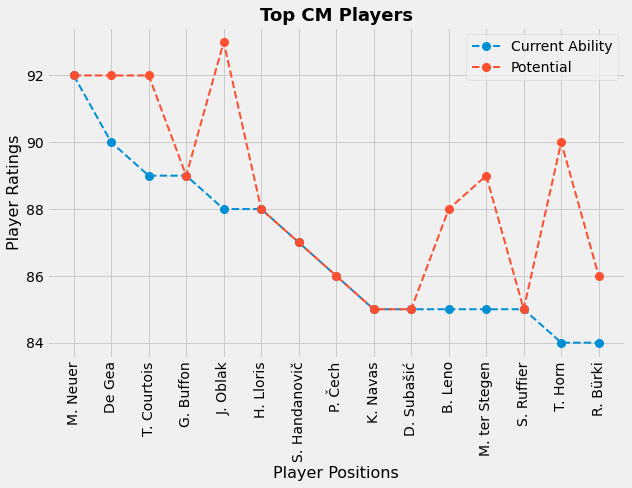

In [69]:
x_val, y1_val, y2_val = range(15),  a['Overall'], a['Potential']
plt.figure(figsize=(9, 7))

plt.plot(x_val, y1_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Current Ability')
plt.plot(x_val, y2_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Potential')
plt.xticks(ticks=x_val, labels=a['Name'], rotation='vertical')
plt.xlabel('Player Positions', fontsize=16)
plt.ylabel('Player Ratings', fontsize=16)
plt.title('Top CM Players', fontsize=18, fontweight='heavy')

plt.legend()
plt.tight_layout()
plt.show()

In [70]:
# LM
a = fballers_by_position(fbal5,'LM')
a

,Name,Age,Overall,Potential
36,C. Eriksen,25,87,91
42,David Silva,31,87,87
45,Iniesta,33,87,87
48,Isco,25,86,90
51,Alex Sandro,26,86,88
75,H. Mkhitaryan,28,85,85
96,D. Alli,21,84,90
99,J. Draxler,23,84,87
104,Koke,25,84,88
132,T. Lemar,21,83,91


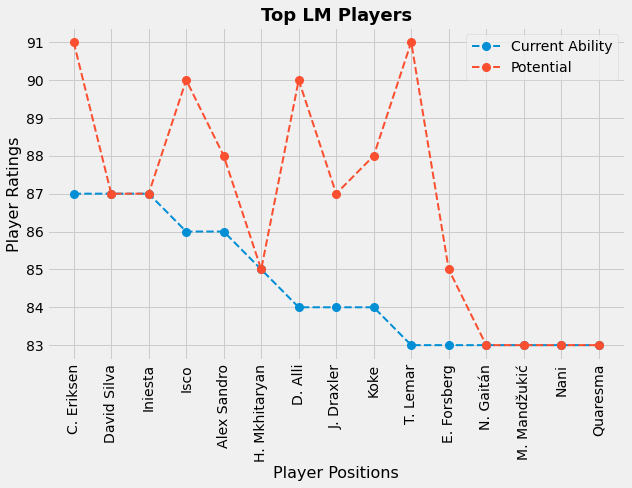

In [71]:
x_val, y1_val, y2_val = range(15),  a['Overall'], a['Potential']
plt.figure(figsize=(9, 7))

plt.plot(x_val, y1_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Current Ability')
plt.plot(x_val, y2_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Potential')
plt.xticks(ticks=x_val, labels=a['Name'], rotation='vertical')
plt.xlabel('Player Positions', fontsize=16)
plt.ylabel('Player Ratings', fontsize=16)
plt.title('Top LM Players', fontsize=18, fontweight='heavy')

plt.legend()
plt.tight_layout()
plt.show()

In [72]:
# LW
a = fballers_by_position(fbal5,'LW')
a

,Name,Age,Overall,Potential
2,Neymar,25,92,94
7,E. Hazard,26,90,91
21,A. Griezmann,26,88,91
55,M. Reus,28,86,86
66,F. Ribéry,34,86,86
72,L. Insigne,26,85,86
83,A. Di María,29,85,85
93,Marco Asensio,21,84,92
97,S. Mané,25,84,87
109,Pedro,29,84,84


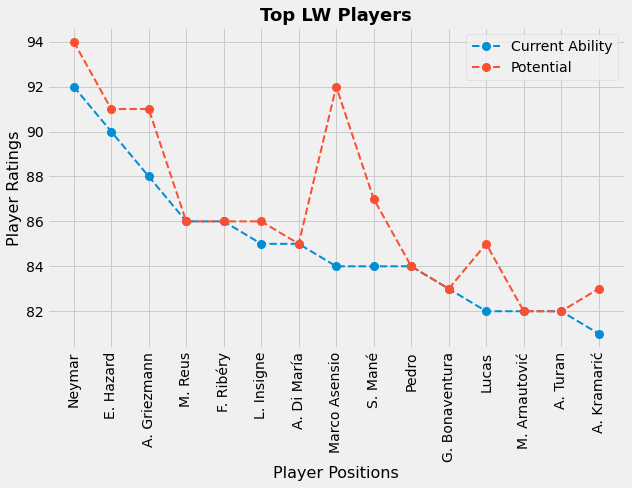

In [73]:
x_val, y1_val, y2_val = range(15),  a['Overall'], a['Potential']
plt.figure(figsize=(9, 7))

plt.plot(x_val, y1_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Current Ability')
plt.plot(x_val, y2_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Potential')
plt.xticks(ticks=x_val, labels=a['Name'], rotation='vertical')
plt.xlabel('Player Positions', fontsize=16)
plt.ylabel('Player Ratings', fontsize=16)
plt.title('Top LW Players', fontsize=18, fontweight='heavy')

plt.legend()
plt.tight_layout()
plt.show()

In [74]:
# LWB
a = fballers_by_position(fbal5,'LWB')
a

,Name,Age,Overall,Potential
279,D. Rose,26,82,83
751,B. Davies,24,78,82
756,B. Mendy,22,78,86
892,J. Holebas,33,78,78
1481,A. Cresswell,27,76,77
1583,Diego Rico,24,76,81
1602,A. Masuaku,23,75,81
1835,E. Pieters,28,75,75
1946,A. Robertson,23,75,82
1964,Toño García,27,75,76


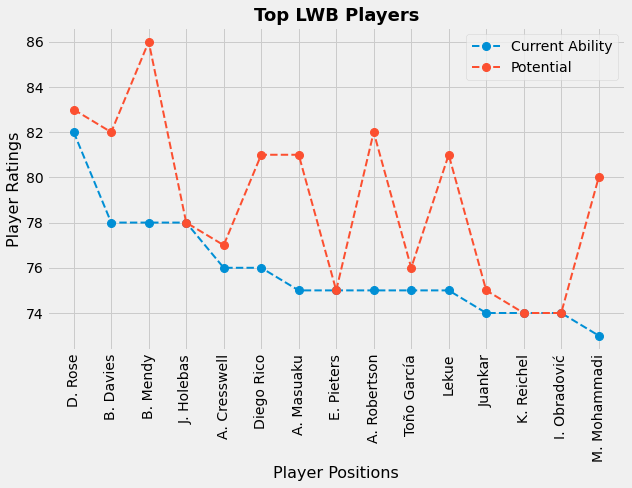

In [75]:
x_val, y1_val, y2_val = range(15),  a['Overall'], a['Potential']
plt.figure(figsize=(9, 7))

plt.plot(x_val, y1_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Current Ability')
plt.plot(x_val, y2_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Potential')
plt.xticks(ticks=x_val, labels=a['Name'], rotation='vertical')
plt.xlabel('Player Positions', fontsize=16)
plt.ylabel('Player Ratings', fontsize=16)
plt.title('Top LWB Players', fontsize=18, fontweight='heavy')

plt.legend()
plt.tight_layout()
plt.show()

In [76]:
# RB
a = fballers_by_position(fbal5,'RB')
a

,Name,Age,Overall,Potential
98,Carvajal,25,84,87
124,Dani Alves,34,84,84
181,A. Valencia,31,83,83
187,Juanfran,32,83,83
221,A. Rüdiger,24,82,86
248,N. Clyne,26,82,84
270,B. Ivanović,33,82,82
295,Fernandinho,32,82,82
300,Nélson Semedo,23,81,87
320,Héctor Bellerín,22,81,88


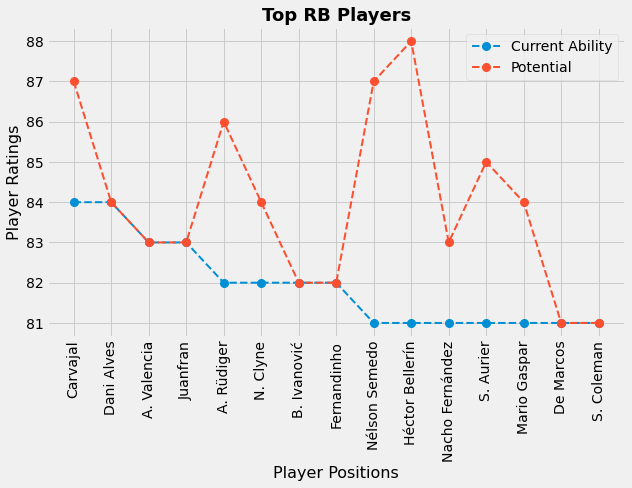

In [77]:
x_val, y1_val, y2_val = range(15),  a['Overall'], a['Potential']
plt.figure(figsize=(9, 7))

plt.plot(x_val, y1_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Current Ability')
plt.plot(x_val, y2_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Potential')
plt.xticks(ticks=x_val, labels=a['Name'], rotation='vertical')
plt.xlabel('Player Positions', fontsize=16)
plt.ylabel('Player Ratings', fontsize=16)
plt.title('Top RB Players', fontsize=18, fontweight='heavy')

plt.legend()
plt.tight_layout()
plt.show()

In [78]:
# RM
a = fballers_by_position(fbal5,'RM')
a

,Name,Age,Overall,Potential
11,K. De Bruyne,26,89,92
13,A. Sánchez,28,89,89
47,J. Rodríguez,25,86,89
69,Y. Carrasco,23,85,90
94,Bernardo Silva,22,84,91
118,Juan Mata,29,84,84
143,R. Mahrez,26,83,84
147,Vitolo,27,83,83
213,Lucas Vázquez,26,82,83
214,Saúl,22,82,90


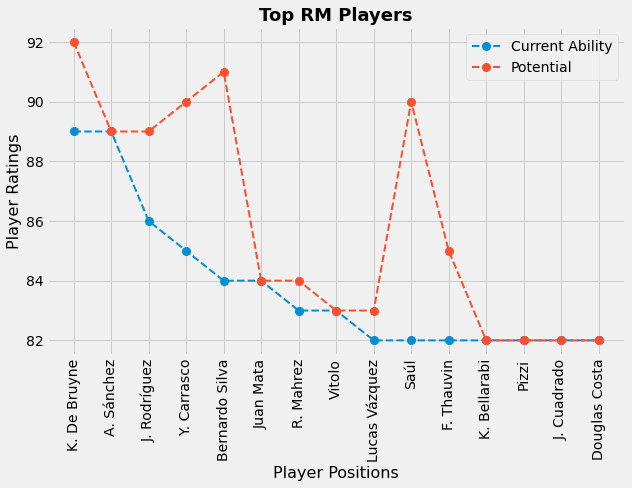

In [79]:
x_val, y1_val, y2_val = range(15),  a['Overall'], a['Potential']
plt.figure(figsize=(9, 7))

plt.plot(x_val, y1_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Current Ability')
plt.plot(x_val, y2_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Potential')
plt.xticks(ticks=x_val, labels=a['Name'], rotation='vertical')
plt.xlabel('Player Positions', fontsize=16)
plt.ylabel('Player Ratings', fontsize=16)
plt.title('Top RM Players', fontsize=18, fontweight='heavy')

plt.legend()
plt.tight_layout()
plt.show()

In [80]:
# RW
a = fballers_by_position(fbal5,'RW')
a

,Name,Age,Overall,Potential
1,L. Messi,30,93,93
15,G. Bale,27,89,89
28,M. Özil,28,88,88
32,A. Robben,33,88,88
137,M. Salah,25,83,86
153,Iago Aspas,29,83,83
156,J. Pastore,28,83,83
166,José Callejón,30,83,83
230,Suso,23,82,87
231,Deulofeu,23,82,89


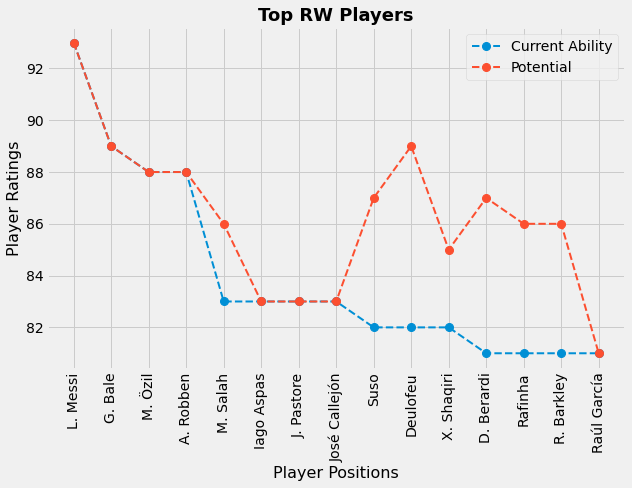

In [81]:
x_val, y1_val, y2_val = range(15),  a['Overall'], a['Potential']
plt.figure(figsize=(9, 7))

plt.plot(x_val, y1_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Current Ability')
plt.plot(x_val, y2_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Potential')
plt.xticks(ticks=x_val, labels=a['Name'], rotation='vertical')
plt.xlabel('Player Positions', fontsize=16)
plt.ylabel('Player Ratings', fontsize=16)
plt.title('Top RW Players', fontsize=18, fontweight='heavy')

plt.legend()
plt.tight_layout()
plt.show()

In [82]:
# RWB
a = fballers_by_position(fbal5,'RWB')
a

,Name,Age,Overall,Potential
161,K. Walker,27,83,84
431,A. Oxlade-Chamberlain,23,80,85
449,M. Antonio,27,80,81
907,K. Trippier,26,78,79
1205,D. Janmaat,27,77,77
1281,G. Cameron,31,76,76
1328,T. Chandler,27,76,77
1346,J. Damm,24,76,79
1894,A. Eschenko,33,75,75
2181,D. Suárez,29,74,74


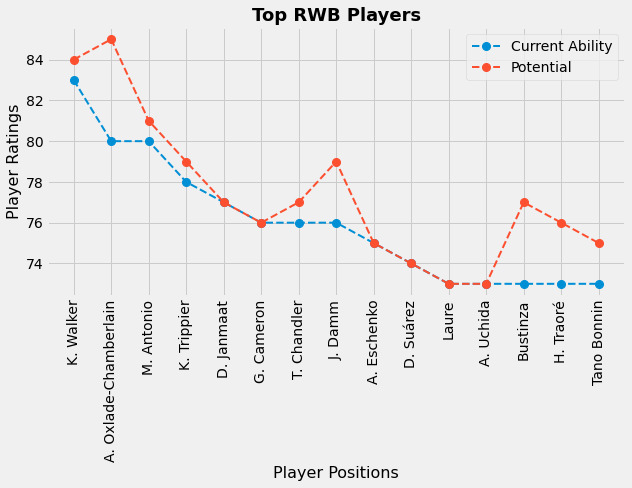

In [83]:
x_val, y1_val, y2_val = range(15),  a['Overall'], a['Potential']
plt.figure(figsize=(9, 7))

plt.plot(x_val, y1_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Current Ability')
plt.plot(x_val, y2_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Potential')
plt.xticks(ticks=x_val, labels=a['Name'], rotation='vertical')
plt.xlabel('Player Positions', fontsize=16)
plt.ylabel('Player Ratings', fontsize=16)
plt.title('Top RWB Players', fontsize=18, fontweight='heavy')

plt.legend()
plt.tight_layout()
plt.show()

In [84]:
# ST
a = fballers_by_position(fbal5,'ST')
a

,Name,Age,Overall,Potential
0,Cristiano Ronaldo,32,94,94
3,L. Suárez,30,92,92
5,R. Lewandowski,28,91,91
9,G. Higuaín,29,90,90
16,S. Agüero,29,89,89
19,P. Dybala,23,88,93
23,P. Aubameyang,28,88,88
31,Z. Ibrahimović,35,88,88
38,E. Cavani,30,87,87
46,H. Kane,23,86,90


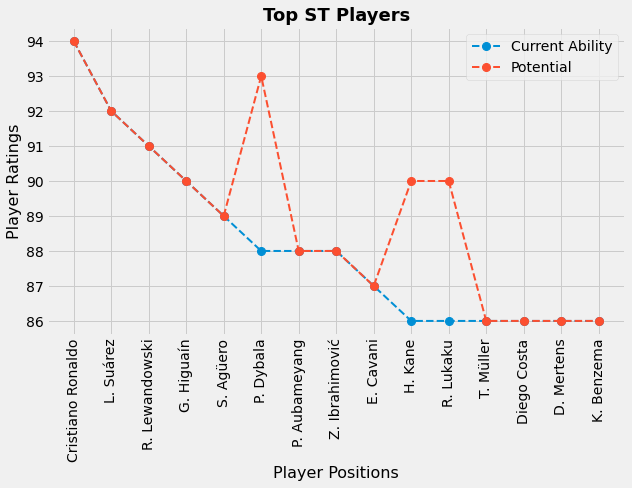

In [85]:
x_val, y1_val, y2_val = range(15),  a['Overall'], a['Potential']
plt.figure(figsize=(9, 7))

plt.plot(x_val, y1_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Current Ability')
plt.plot(x_val, y2_val, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Potential')
plt.xticks(ticks=x_val, labels=a['Name'], rotation='vertical')
plt.xlabel('Player Positions', fontsize=16)
plt.ylabel('Player Ratings', fontsize=16)
plt.title('Top ST Players', fontsize=18, fontweight='heavy')

plt.legend()
plt.tight_layout()
plt.show()

#### Clubs with the most top players (Overall > 81)

In [86]:
# Determine the clubs with the most top players
cut_off = np.percentile(fbal5['Overall'], 98)   # 95th percentile

top_players_df = fbal5.loc[fbal5['Overall'] > cut_off, ['Name', 'Age', 'Nationality', 'Club', 'Overall', 'Potential', 'Value (M)','Wage (K)','Fav_position']]
top_players_df   # top 2% of the players

,Name,Age,Nationality,Club,Overall,Potential,Value (M),Wage (K),Fav_position
0,Cristiano Ronaldo,32,Portugal,Real Madrid CF,94,94,95.5,565,ST
1,L. Messi,30,Argentina,FC Barcelona,93,93,105.0,565,RW
2,Neymar,25,Brazil,Paris Saint-Germain,92,94,123.0,280,LW
3,L. Suárez,30,Uruguay,FC Barcelona,92,92,97.0,510,ST
4,M. Neuer,31,Germany,FC Bayern Munich,92,92,61.0,230,GK
...,...,...,...,...,...,...,...,...,...
294,A. Turan,30,Turkey,FC Barcelona,82,82,20.5,170,LW
295,Fernandinho,32,Brazil,Manchester City,82,82,12.5,130,RB
296,David Villa,35,Spain,New York City Football Club,82,82,10.0,12,ST
297,S. Lichtsteiner,33,Switzerland,Juventus,82,82,8.5,115,RM


In [87]:
a = pd.crosstab(index=top_players_df['Club'], columns='No_of_Players').sort_values('No_of_Players', ascending=False).head(15)
a.columns = ['No_of_Players']
top_clubs = [*a.index]  # list containing the top 15 clubs.
a

,No_of_Players
Club,
Juventus,18
Real Madrid CF,15
FC Barcelona,14
FC Bayern Munich,14
Manchester City,14
Chelsea,13
Manchester United,12
Atlético Madrid,12
Paris Saint-Germain,12


**Comment:**
* **Juventus** and **Real Madrid** are the top two clubs with the best players in the game.
* The top 15 clubs are dominated by **English clubs** with 6 out of a total of 15.
* **Spanish** and **Italian clubs** tie with 3 clubs each making the top 15 clubs in the game.

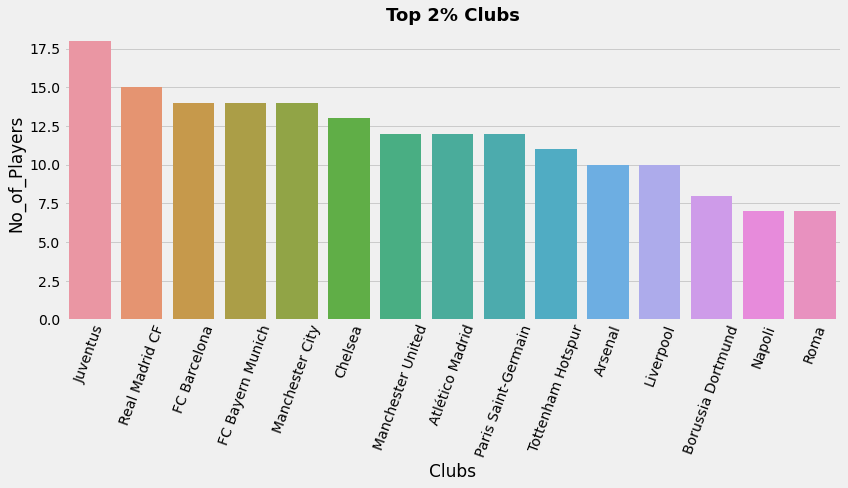

In [88]:
# Plot
x_val = range(15) 
plt.figure(figsize=(12, 7))
sns.barplot(x=a.index, y=a['No_of_Players'])
plt.xticks(ticks=x_val, labels=a.index, rotation=70)
plt.xlabel('Clubs', fontsize=17)
plt.title('Top 2% Clubs', fontsize=18, fontweight='heavy')

plt.tight_layout()
plt.show()

In [89]:
top_clubs_df = top_players_df[top_players_df['Club'].isin(top_clubs)]
top_clubs_df.head()

,Name,Age,Nationality,Club,Overall,Potential,Value (M),Wage (K),Fav_position
0,Cristiano Ronaldo,32,Portugal,Real Madrid CF,94,94,95.5,565,ST
1,L. Messi,30,Argentina,FC Barcelona,93,93,105.0,565,RW
2,Neymar,25,Brazil,Paris Saint-Germain,92,94,123.0,280,LW
3,L. Suárez,30,Uruguay,FC Barcelona,92,92,97.0,510,ST
4,M. Neuer,31,Germany,FC Bayern Munich,92,92,61.0,230,GK


In [90]:
a = pd.crosstab(index=top_clubs_df['Club'], columns=top_clubs_df['Fav_position'], margins=True)
a

Fav_position,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,All
Club,,,,,,,,,,,,,,,,
Arsenal,0,2,2,0,0,1,0,0,0,0,0,2,1,0,2,10
Atlético Madrid,0,3,0,0,0,1,1,2,1,0,1,2,0,0,1,12
Borussia Dortmund,0,3,0,1,0,1,0,0,1,0,0,1,0,0,1,8
Chelsea,2,2,0,0,2,1,1,0,2,0,1,0,0,0,2,13
FC Barcelona,2,2,1,0,2,1,1,1,1,0,0,0,2,0,1,14
FC Bayern Munich,0,3,3,0,2,1,0,0,1,0,0,1,1,0,2,14
Juventus,0,4,3,0,1,2,0,3,0,0,0,3,0,0,2,18
Liverpool,3,1,0,0,2,0,0,0,1,0,1,0,1,0,1,10
Manchester City,0,2,2,0,0,2,0,3,0,0,1,2,0,1,1,14


**Comment:**
* The top players by position is shown in the table above.

In [91]:
# Column calculations
col_cal = a / a.loc['All']
col_cal.apply(lambda x: x * 100)     # convert to percent

Fav_position,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,All
Club,,,,,,,,,,,,,,,,
Arsenal,0.0,6.060606,9.523810,0.0,0.000000,6.666667,0.0,0.000000,0.000000,0.0,0.000000,15.384615,12.5,0.0,8.333333,5.649718
Atlético Madrid,0.0,9.090909,0.000000,0.0,0.000000,6.666667,20.0,14.285714,8.333333,0.0,14.285714,15.384615,0.0,0.0,4.166667,6.779661
Borussia Dortmund,0.0,9.090909,0.000000,100.0,0.000000,6.666667,0.0,0.000000,8.333333,0.0,0.000000,7.692308,0.0,0.0,4.166667,4.519774
Chelsea,25.0,6.060606,0.000000,0.0,14.285714,6.666667,20.0,0.000000,16.666667,0.0,14.285714,0.000000,0.0,0.0,8.333333,7.344633
FC Barcelona,25.0,6.060606,4.761905,0.0,14.285714,6.666667,20.0,7.142857,8.333333,0.0,0.000000,0.000000,25.0,0.0,4.166667,7.909605
FC Bayern Munich,0.0,9.090909,14.285714,0.0,14.285714,6.666667,0.0,0.000000,8.333333,0.0,0.000000,7.692308,12.5,0.0,8.333333,7.909605
Juventus,0.0,12.121212,14.285714,0.0,7.142857,13.333333,0.0,21.428571,0.000000,0.0,0.000000,23.076923,0.0,0.0,8.333333,10.169492
Liverpool,37.5,3.030303,0.000000,0.0,14.285714,0.000000,0.0,0.000000,8.333333,0.0,14.285714,0.000000,12.5,0.0,4.166667,5.649718
Manchester City,0.0,6.060606,9.523810,0.0,0.000000,13.333333,0.0,21.428571,0.000000,0.0,14.285714,15.384615,0.0,100.0,4.166667,7.909605


**Comment:**
* The percentage of top players by position is shown in the table above.


<br>

#### Nations with the most top players (Overall > 81)

In [92]:
a = pd.crosstab(index=top_players_df['Nationality'], columns='No_of_Players').sort_values('No_of_Players', ascending=False).head(15)
a.columns = ['No_of_Players']
top_nations = [*a.index]  # list containing the top 15 nations.
a

,No_of_Players
Nationality,
Spain,47
Germany,30
France,30
Brazil,26
Italy,21
Argentina,18
Portugal,14
England,13
Belgium,12


**Comment:**
* The top players by position is shown in the table above.
* It is on a country basis.
* **Spain** has by far the most top players in the game. (Top 2%)
* **Europe** has the most top players in the game.
* **Senegal** is the most top players in Africa.

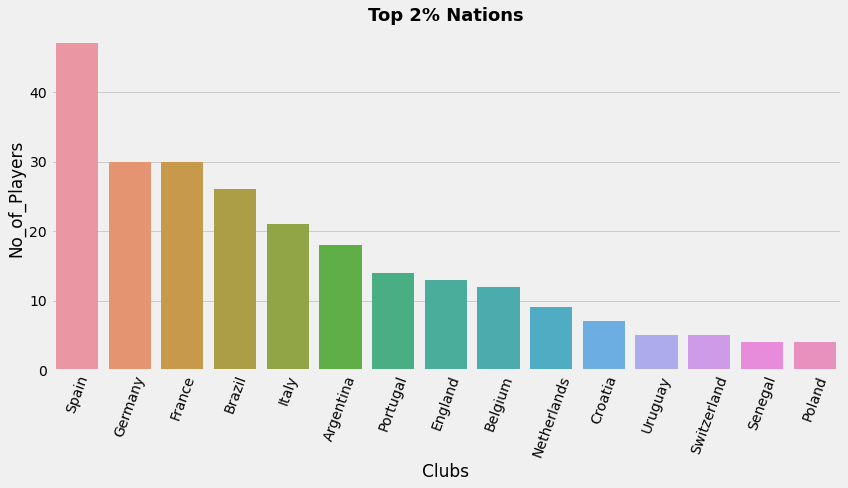

In [93]:
# Plot
x_val = range(15) 
plt.figure(figsize=(12, 7))
sns.barplot(x=a.index, y=a['No_of_Players'])
plt.xticks(ticks=x_val, labels=a.index, rotation=70)
plt.xlabel('Clubs', fontsize=17)
plt.title('Top 2% Nations', fontsize=18, fontweight='heavy')

plt.tight_layout()
plt.show()

In [94]:
top_nations_df = top_players_df[top_players_df['Nationality'].isin(top_nations)]

a = pd.crosstab(index=top_nations_df['Nationality'], columns=top_nations_df['Fav_position'], margins=True)
a

Fav_position,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,All
Nationality,,,,,,,,,,,,,,,,
Argentina,0,4,1,0,2,1,1,1,1,0,0,0,2,0,5,18
Belgium,2,3,1,0,0,1,0,0,1,0,0,2,0,0,2,12
Brazil,5,6,2,1,0,1,2,1,2,0,2,2,0,0,2,26
Croatia,1,1,2,0,1,1,0,1,0,0,0,0,0,0,0,7
England,0,1,0,0,3,1,1,2,0,1,1,0,0,1,2,13
France,2,5,2,0,5,4,0,1,2,0,0,2,0,0,7,30
Germany,2,6,4,0,1,7,0,2,1,0,1,2,1,0,3,30
Italy,0,4,3,1,1,5,0,1,2,0,0,0,0,0,4,21
Netherlands,3,2,1,0,0,0,0,1,0,0,0,0,1,0,1,9


**Comment:**
* The top players by nationality is shown in the table above.

In [95]:
# Column calculations
col_cal = a / a.loc['All']
col_cal.apply(lambda x: x * 100)     # convert to percent

Fav_position,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,All
Nationality,,,,,,,,,,,,,,,,
Argentina,0.000000,9.302326,4.166667,0.000000,10.526316,3.030303,16.666667,6.25,8.333333,0.0,0.000000,0.000000,22.222222,0.0,14.285714,7.346939
Belgium,9.090909,6.976744,4.166667,0.000000,0.000000,3.030303,0.000000,0.00,8.333333,0.0,0.000000,13.333333,0.000000,0.0,5.714286,4.897959
Brazil,22.727273,13.953488,8.333333,33.333333,0.000000,3.030303,33.333333,6.25,16.666667,0.0,33.333333,13.333333,0.000000,0.0,5.714286,10.612245
Croatia,4.545455,2.325581,8.333333,0.000000,5.263158,3.030303,0.000000,6.25,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,2.857143
England,0.000000,2.325581,0.000000,0.000000,15.789474,3.030303,16.666667,12.50,0.000000,100.0,16.666667,0.000000,0.000000,100.0,5.714286,5.306122
France,9.090909,11.627907,8.333333,0.000000,26.315789,12.121212,0.000000,6.25,16.666667,0.0,0.000000,13.333333,0.000000,0.0,20.000000,12.244898
Germany,9.090909,13.953488,16.666667,0.000000,5.263158,21.212121,0.000000,12.50,8.333333,0.0,16.666667,13.333333,11.111111,0.0,8.571429,12.244898
Italy,0.000000,9.302326,12.500000,33.333333,5.263158,15.151515,0.000000,6.25,16.666667,0.0,0.000000,0.000000,0.000000,0.0,11.428571,8.571429
Netherlands,13.636364,4.651163,4.166667,0.000000,0.000000,0.000000,0.000000,6.25,0.000000,0.0,0.000000,0.000000,11.111111,0.0,2.857143,3.673469


**Comment:**
* The percentage of top players by nationality is shown in the table above.

<br>

### Relationship between: 
* wage and overall 
* wage and value
* value and overall

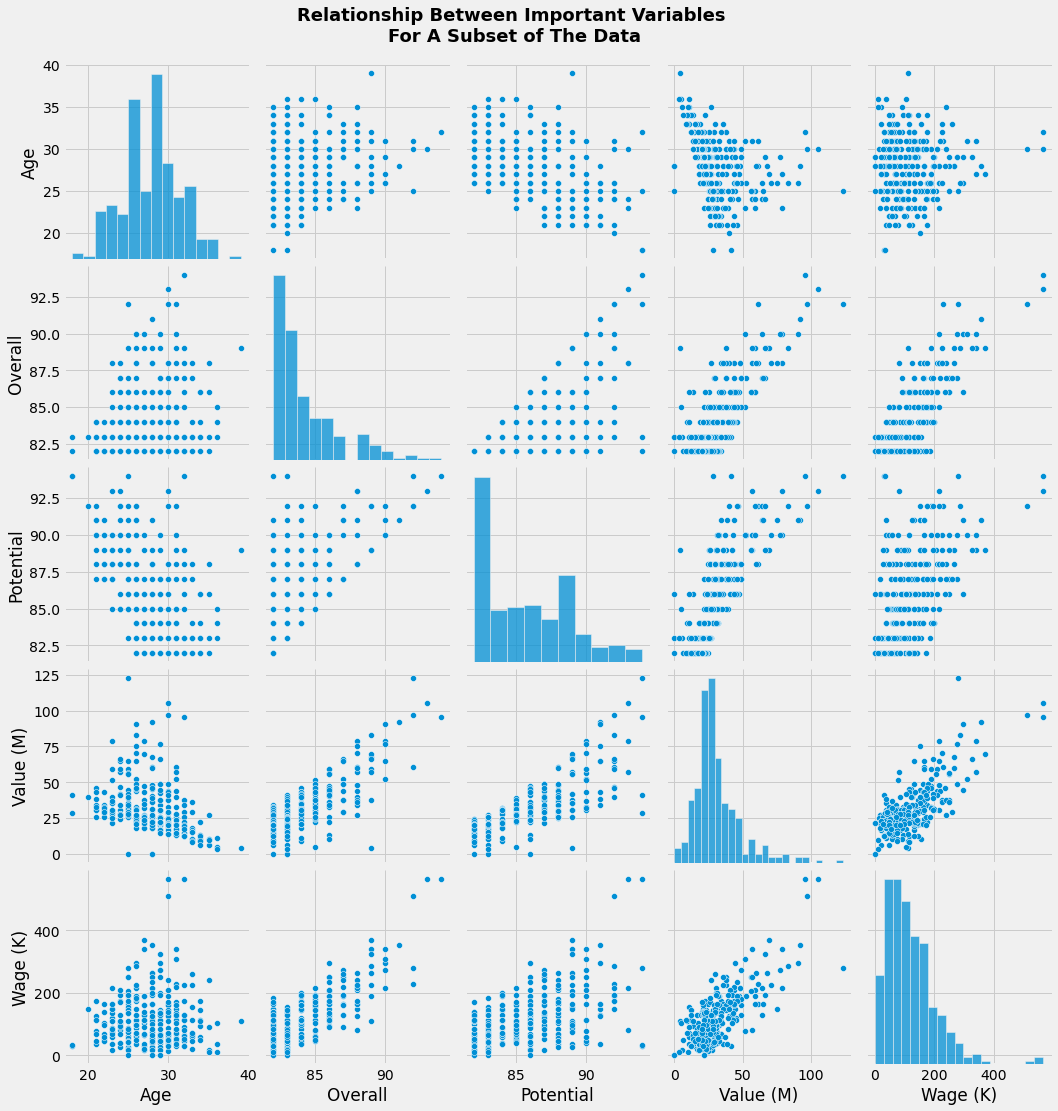

In [104]:
sns.pairplot(data=top_players_df, height=3)
plt.title('Relationship Between Important Variables \nFor A Subset of The Data', fontsize=18, fontweight='heavy', y=4.2, x=-1.9)

plt.show()

**Comment: For the top 2% players**
* `Overall`, `Potential` do not follow a normal distribution.
* `Overall` and `Potential` are slightly positively correlated.
* `Overall` and `Value`, `Overall` and `Wage`, `Wage` and `Value`,  `Wage` and `Potential` are positively correlated.
* `Age` and `Potential` , `Age` and `Overall` are negatively correlated.


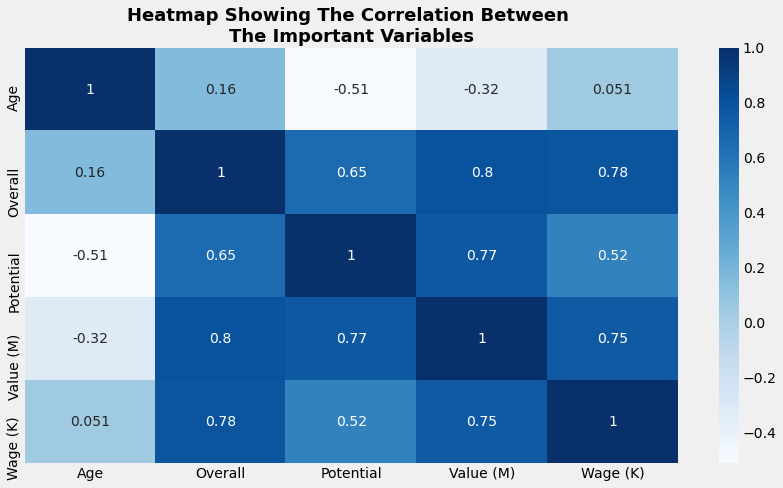

In [97]:
# heatmap
plt.figure(figsize=(12, 7))

sns.heatmap(data=top_players_df.corr(), annot=True, cmap='Blues')
plt.title('Heatmap Showing The Correlation Between \nThe Important Variables', fontsize=18, fontweight='heavy')

plt.tight_layout()
plt.show()

**Comment:**
* The observations in the pairplot obtained earlier are confirmed with this correlation heatmap.

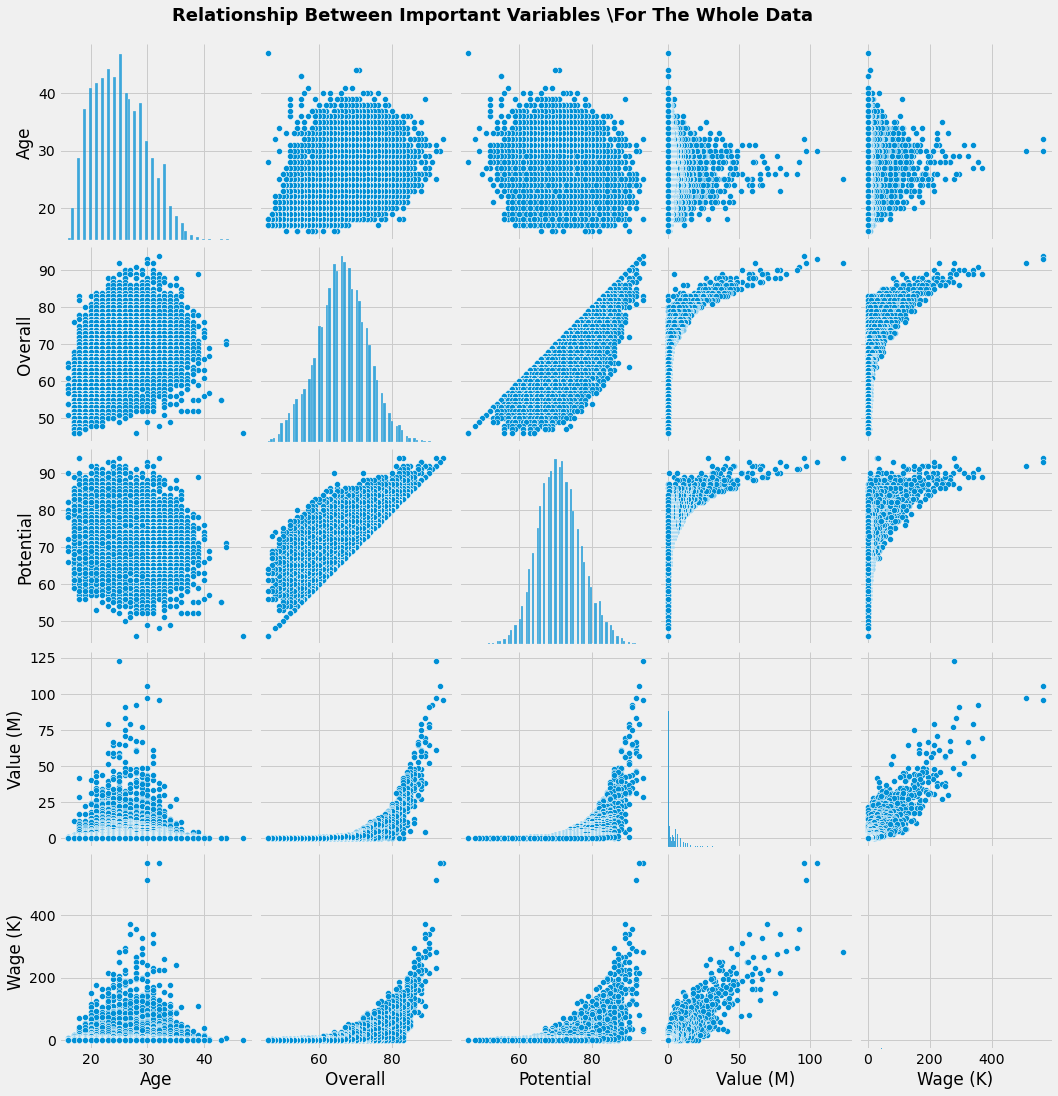

In [103]:
sns.pairplot(data=fbal5[['Name', 'Age', 'Nationality', 'Club', 'Overall', 'Potential', 'Value (M)','Wage (K)','Fav_position']], height=3)
plt.title('Relationship Between Important Variables \nFor The Whole Data', fontsize=18, fontweight='heavy', y=4.2, x=-1.9)

plt.show()

**Comment:**
* The relationship between the variables are different from the one obtained for the subset of the data.
* `Age` and `Value`, `Age` and `Wage` have slight negative correlation.
* `Potential` and `Value`, `Potential` and `Wage` are positively correlated with some outliers.
* `Wage` and `Value`, `Potential` and `Overall` have strong positive correlation.

In [137]:
a = pd.crosstab(index=fbal5['Club'], columns='Wage (K)', values=fbal5['Wage (K)'], aggfunc=np.sum).sort_values('Wage (K)', ascending=False).head(15)
a.columns = ['Wage (K)']
a

,Wage (K)
Club,
FC Barcelona,4792
Real Madrid CF,4751
Manchester United,3653
Chelsea,3537
FC Bayern Munich,3273
Juventus,3165
Manchester City,3152
Arsenal,3007
Liverpool,2664


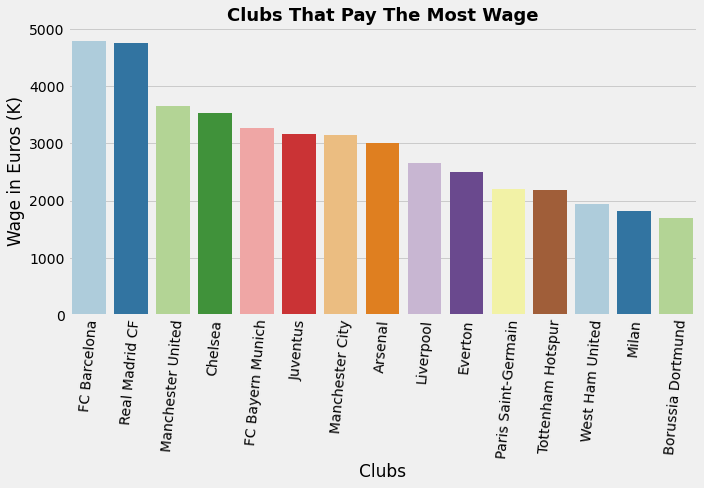

In [145]:
# Plot
x_val = range(15)

plt.figure(figsize=(10, 7))
sns.barplot(x=a.index, y=a['Wage (K)'], palette='Paired')
plt.xticks(ticks=x_val, labels=a.index, rotation=85)
plt.xlabel('Clubs', fontsize=17)
plt.ylabel('Wage in Euros (K)', fontsize=17)
plt.title('Clubs That Pay The Most Wage', fontsize=18, fontweight='heavy')

plt.tight_layout()
plt.show()

**Comment:**
* **Barcelona**, **Real Madrid**, **Manchester Utd** and **Chelsea** make the top four paying clubs.
* The chart is heavily dominated by **English** clubs with a total of **8** out of **15** clubs.

In [154]:
# Top earning positions
a = pd.crosstab(fbal5['Fav_position'], columns='Wage (K)', values=fbal5['Wage (K)'], aggfunc=np.mean).sort_values('Wage (K)', ascending=False) 
a

col_0,Wage (K)
Fav_position,
LW,15.803279
RW,15.568765
RWB,13.783784
ST,13.341238
CDM,13.244986
LM,12.693816
LWB,12.616667
CF,12.453659
CB,11.798152


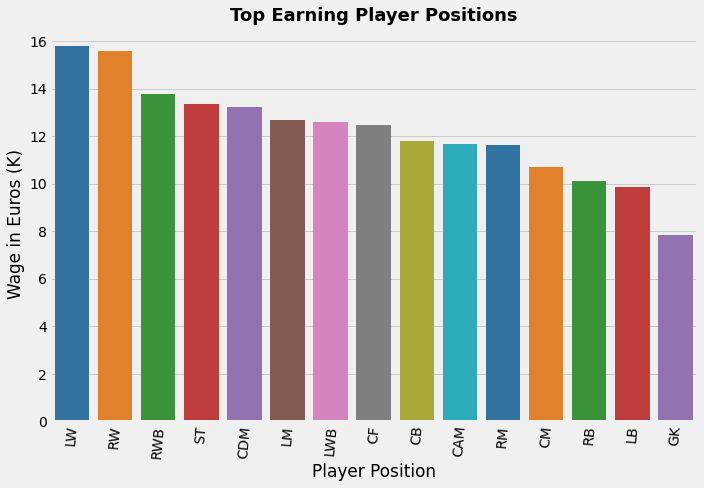

In [158]:
# Plot
x_val = range(15)

plt.figure(figsize=(10, 7))
sns.barplot(x=a.index, y=a['Wage (K)'], palette='tab10')
plt.xticks(ticks=x_val, labels=a.index, rotation=85)
plt.xlabel('Player Position', fontsize=17)
plt.ylabel('Wage in Euros (K)', fontsize=17)
plt.title('Top Earning Player Positions', fontsize=18, fontweight='heavy')

plt.tight_layout()
plt.show()

**Comment:**
* Offensive player positions generally tend to earn higher than players in other positions
* Goalkeepers earn the least amount.

In [159]:
fbal5.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Currency,Value (M),Wage (K),Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Fav_position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€,95.5,565,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,ST
1,L. Messi,30,Argentina,93,93,FC Barcelona,€,105.0,565,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,RW


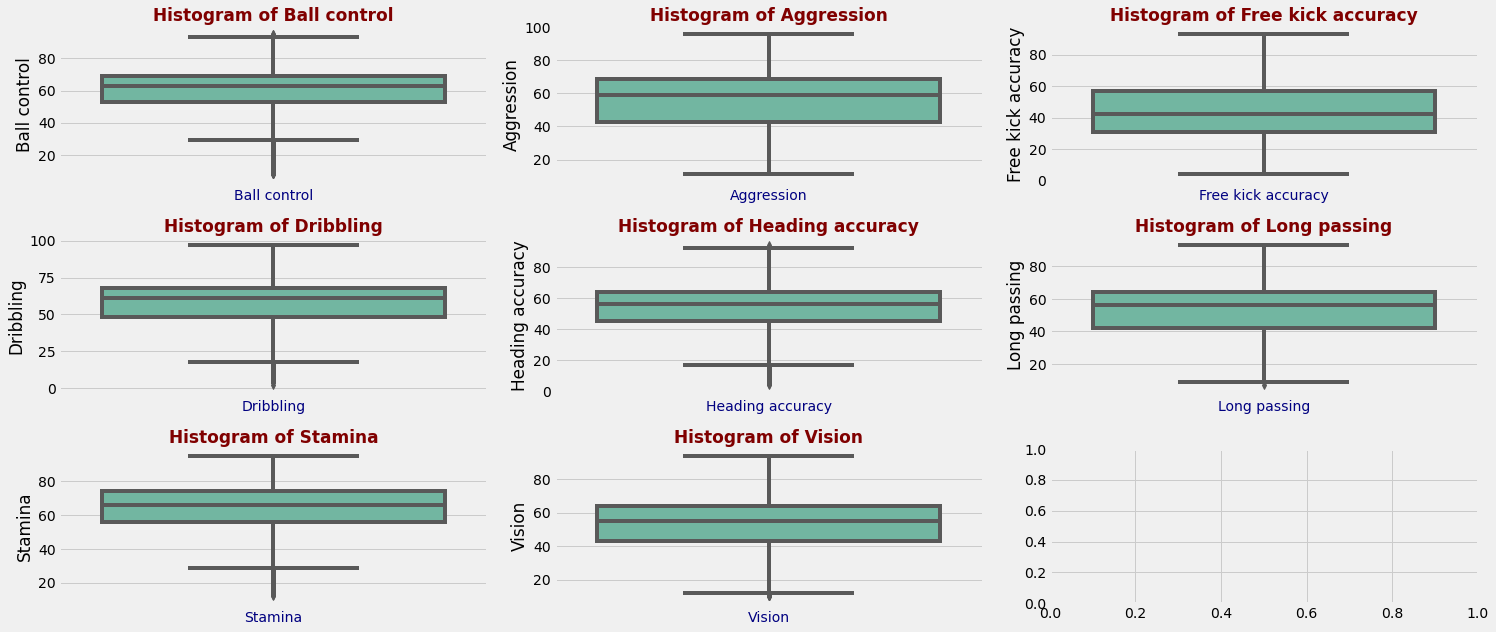

In [165]:
# histogram

nrows, ncols = 3, 3
fig, axs = plt.subplots(nrows, ncols, figsize=(nrows*7, ncols*3))
color = 'c'
color_x, color_t = 'navy', 'maroon'

for (idx, col) in enumerate(['Ball control', 'Aggression', 'Free kick accuracy', 'Dribbling', 'Heading accuracy', 'Long passing', 'Stamina', 'Vision']):
    ax = axs[(idx // ncols), (idx % ncols)]   # axis
    sns.boxplot(data=fbal5, y=col, hue='Fav_position', ax=ax, palette='Set2')                          # plot histogram
    ax.set_xlabel(f"{col}", fontsize=14, color=color_x)                                                # x axis
    ax.set_title(f"Histogram of {col}", fontsize=17, color=color_t, fontweight='heavy')                # title
    
fig.tight_layout()
plt.show()